In [68]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation

In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import os
import cv2

In [70]:
# đọc tên các lớp :  có 9 loại
DIR = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
# DIR = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset"
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [71]:
data = []
path = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
# path = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset"
folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder, folder)
    for i in range(1, 1001):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128,128))
        data.append([img, folder])

In [72]:
# tạo image và label từ data
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

In [73]:
# chuấn hóa label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [74]:
# chuẩn hóa label thành one-hot vector
# from keras.utils import np_utils
# labels = np_utils.to_categorical(labels, 9)
# labels
labels = tf.keras.utils.to_categorical(labels, num_classes=9)
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [75]:
# reshape images
images = np.array(images)
# images = images.reshape(images.shape[0], 150, 150, 3)
images = images.reshape(images.shape[0], 128,128, 3)
images.shape

(9000, 128, 128, 3)

In [76]:
# chuẩn hóa images
images = images.astype('float32') / 255.0

In [77]:
img = images[:100]

In [78]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

model = load_model('model1.hdf5')
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

successive_feature_maps = visualization_model.predict(img)


layer_names = [layer.name for layer in model.layers]




4/4 [==============================] - 1s 105ms/step


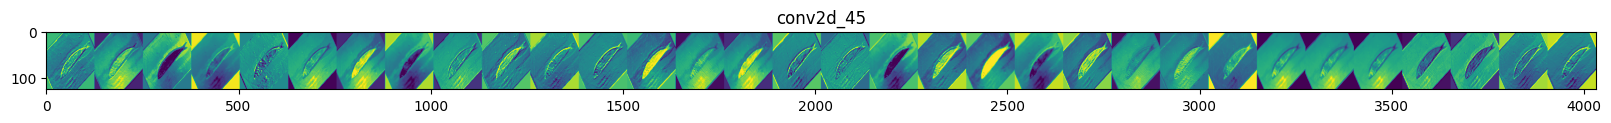

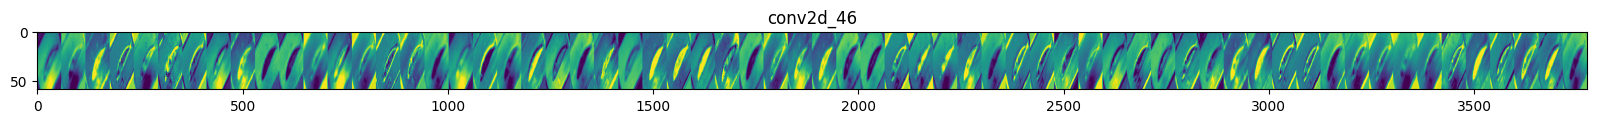

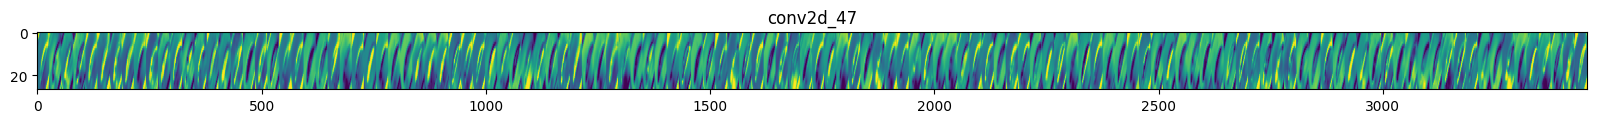

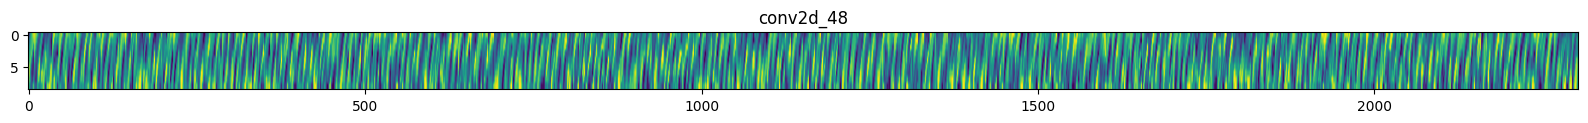

In [79]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if 'conv' in layer_name:

        n_features = feature_map.shape[-1] 
        size = feature_map.shape[1]  
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            img = feature_map[0, :, :, i]
            img -= img.mean()
            img /= img.std()
            img *= 64
            img += 128
            img = np.clip(img, 0, 255).astype('uint8')
            display_grid[:, i * size:(i + 1) * size] = img 

        # scale = 1000/ n_features
        plt.figure(figsize=(20,0.75))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')